PROJECT TYPE: Exploratory Data Analysis

PROJECT SUMMARY:

This project analyses coffee sales data to uncover patterns in customer behaviour and business performance.

Key steps includes:
1. Data Cleaning and Preparion
2. Exploratory Data Analysis
3. Product performance Analysis: by Identifying top performing coffee types and revenue contribution
4. Customer Insights: analyzing payment types, recuring purchases.
5. Time Series Insights: Detecting seasonality and demand patterns across months or days
6. Business recommendation: Suggesting staffing optimization, 

GITHUB LINK:




PROBLEM STATEMENT:

How can we transform raw sales records into actionable business insights that help the coffee shop optimize operations, marketing, and revenue

#Start

In [1]:
#Import Necceessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
coffee_data = pd.read_csv('Coffe_sales.csv')
# Display the first few rows of the dataset.
coffee_data.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
#Dataset rows and columns count
coffee_data.shape

(3547, 11)

In [4]:
#Quick overview of the dataset:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


Overview of the Dataset:

A quick overview of the dataset reveals that:
1. 11 Columns are present (hour_of_day, cash_type, money coffee_name , Time_of_Day, Weekday, Month_name, Weekdaysort, Monthsort, Date, Time)
2. A total of 3547 entries( Rows ) are present.
3. One column is of Float datatype, 3 are integer datatype and 7 are object datatypes.
4. Date and Time columns are registered as object datatype. We will change them to datetime datatype.

DATA VISUSUALIZATIONS AND STORYTELLING:


#Line chart of Daily Revenue

In [5]:
# Convert 'Date' and 'Time' columns to datetime datatype
coffee_data['Date'] = pd.to_datetime(coffee_data['Date'])

In [6]:
#Aggregate daily revenue
daily_revenue = coffee_data.groupby('Date')['money'].sum()

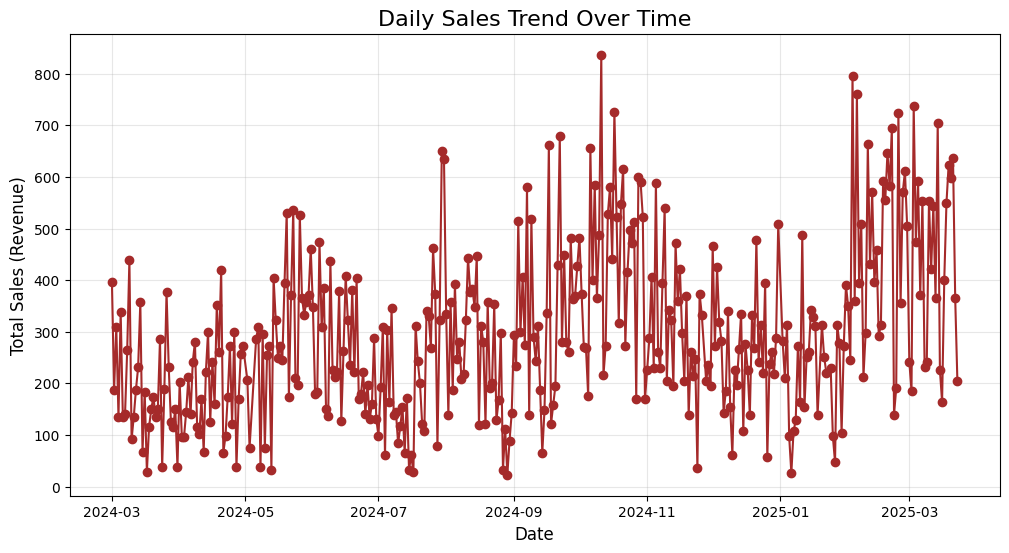

In [7]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', linestyle='-', color='brown')
plt.title("Daily Sales Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales (Revenue)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

2. BarChart of Hourly Sales Distribution

In [8]:
#Hourly Sales Distribution
hourly_sales = coffee_data.groupby('hour_of_day')['money'].sum().reset_index()

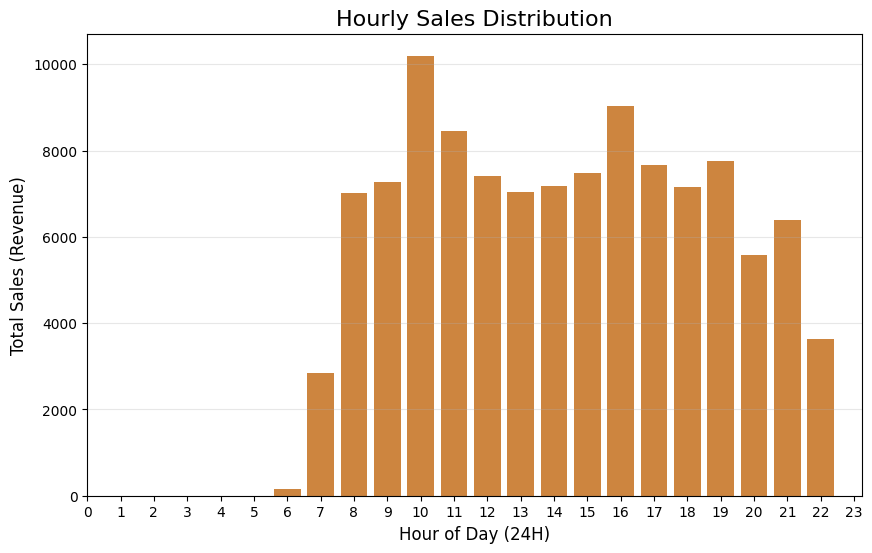

In [9]:
# Plot Hourly Sales Distribution
plt.figure(figsize=(10,6))
plt.bar(hourly_sales['hour_of_day'], hourly_sales['money'], color='peru')
plt.title("Hourly Sales Distribution", fontsize=16)
plt.xlabel("Hour of Day (24H)", fontsize=12)
plt.ylabel("Total Sales (Revenue)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

Why this Chart? 

It is a bar chart showing how sales vary across each hour of the day.


Clear peak periods satndout: 10 AM stands out as peak hour for coffee rush, Evening at 4PM is also peak hour.

3. Day of Week Sales Distribution.
   BarChart

In [10]:
# To keep weekdays in order, use Weekdaysort column
weekday_sales = coffee_data.groupby(['Weekdaysort', 'Weekday'])['money'].sum().reset_index()
weekday_sales = weekday_sales.sort_values('Weekdaysort')

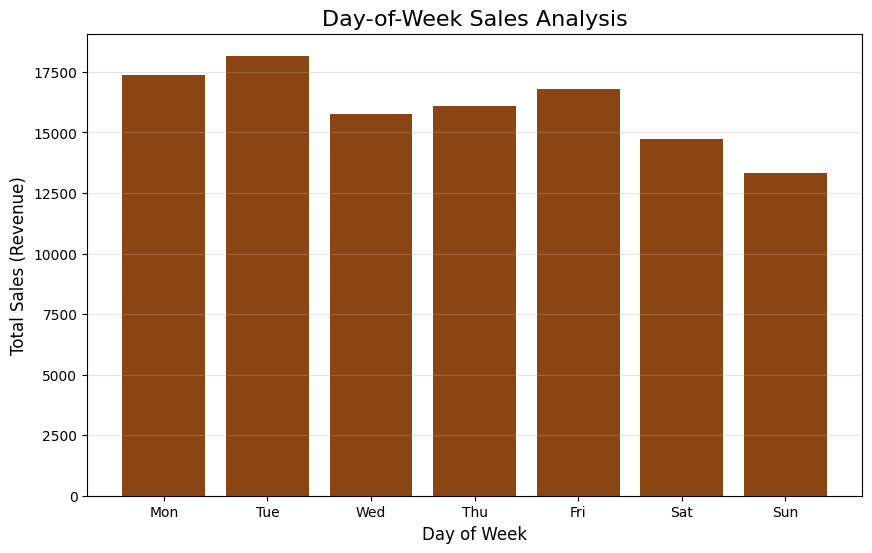

In [11]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(weekday_sales['Weekday'], weekday_sales['money'], color='saddlebrown')
plt.title("Day-of-Week Sales Analysis", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Total Sales (Revenue)", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Why The Chart?

The barchart shows total revenue for each week
Which days are busiest and which are slower are clearly visible.

4. Monthly   Sales Analysis:

Barchart to reveal seasonality



In [12]:
# Group by Month with proper order
monthly_sales = coffee_data.groupby(['Monthsort', 'Month_name'])['money'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Monthsort')

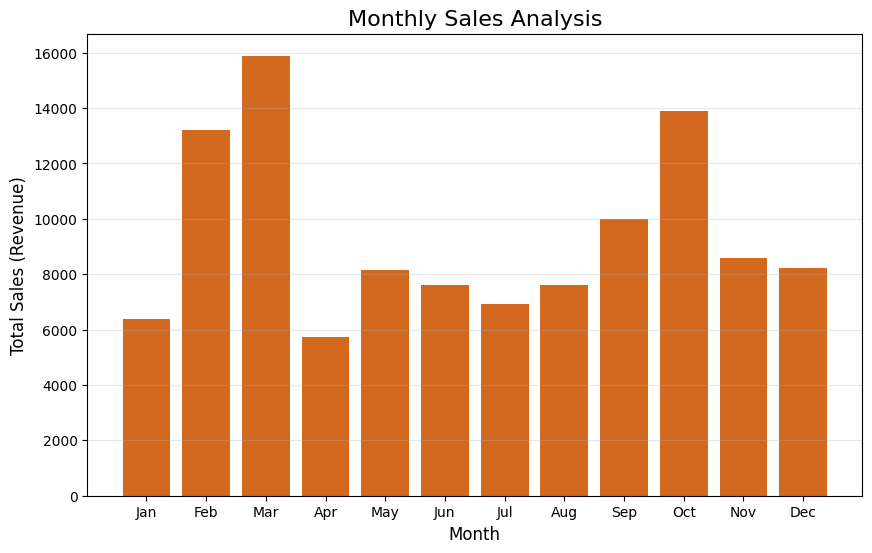

In [13]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(monthly_sales['Month_name'], monthly_sales['money'], color='chocolate')
plt.title("Monthly Sales Analysis", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (Revenue)", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Why the Chart?

This analysis aims to reveal seasonality: 
Each Month sales distribution is visible. We can compare each month performance e.g March vs Oct which reveals peek  sales.
It could also be concluded that these are cold months, that it why sales hike. 
It is evident that in the months of summer, sales are quite down.

This analysis can inform inventory Planning and marketing compaigns

5. Top-Selling Coffee Products

The goal is to identify which  coffee type drives  the most revenue.

In [14]:
# Group by coffee product
product_sales = coffee_data.groupby('coffee_name')['money'].sum().reset_index()


In [15]:
# Sort by revenue and take top 10
top_products = product_sales.sort_values(by='money', ascending=False).head(10)


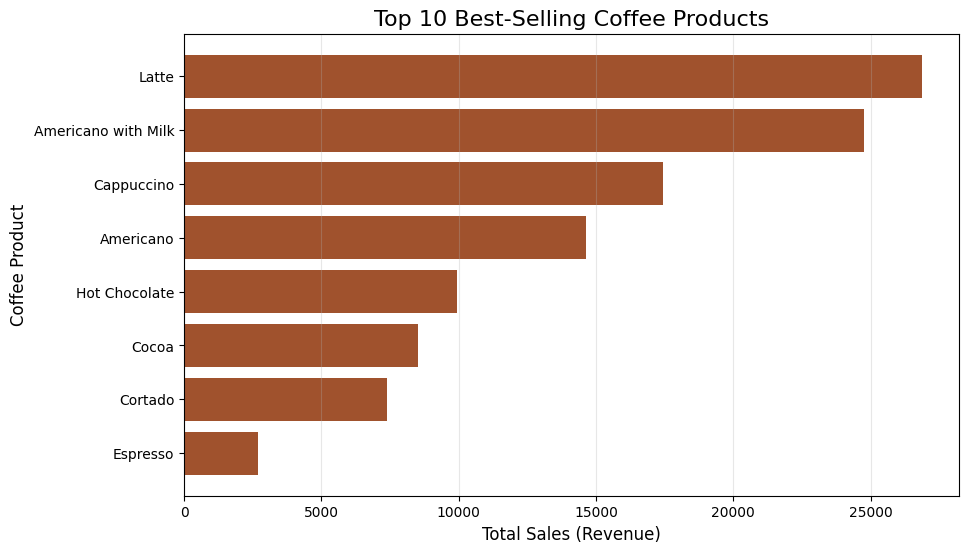

In [16]:

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_products['coffee_name'], top_products['money'], color='sienna')
plt.title("Top 10 Best-Selling Coffee Products", fontsize=16)
plt.xlabel("Total Sales (Revenue)", fontsize=12)
plt.ylabel("Coffee Product", fontsize=12)
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', alpha=0.3)
plt.show()

Why the chart?

Helps to reveal best selling coffee types.
Shows the products that contribute to the most revenue.
Helps to optimze menu and target promotions.

6. Payment Breakdown Analysis:

 Aim is to understand how customers prefer to pay

In [17]:
# Group by payment method
payment_sales = coffee_data.groupby('cash_type')['money'].sum().reset_index()


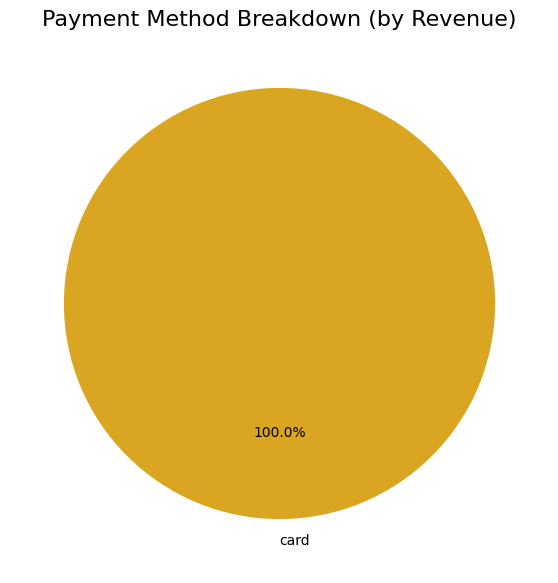

In [18]:
# Pie chart for percentage share
plt.figure(figsize=(7,7))
plt.pie(payment_sales['money'], labels=payment_sales['cash_type'], 
        autopct='%1.1f%%', startangle=90, colors=['goldenrod','peru'])
plt.title("Payment Method Breakdown (by Revenue)", fontsize=16)
plt.show()


Why Chart?

Reveals the most dorminant payment method.
Helps to decide whether to invest morein POS or cash handling

7 Sales by Time of Day

Goal is to compair sales across differnt parts of the day (Morning, Afternoon, Evening, Night)


In [19]:
# Group by time of day category
time_sales = coffee_data.groupby('Time_of_Day')['money'].sum().reset_index()

# Sort for logical order (Morning, Afternoon, Evening, Night)
time_order = ["Morning", "Afternoon", "Evening", "Night"]
time_sales['Time_of_Day'] = pd.Categorical(time_sales['Time_of_Day'], categories=time_order, ordered=True)
time_sales = time_sales.sort_values('Time_of_Day')

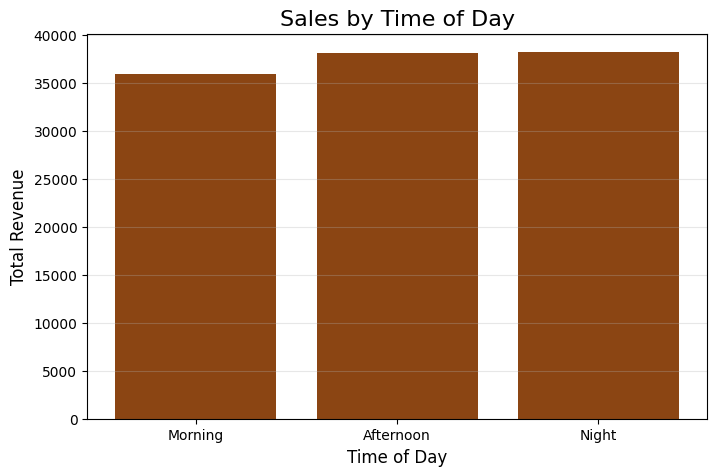

In [20]:
# Plot
plt.figure(figsize=(8,5))
plt.bar(time_sales['Time_of_Day'], time_sales['money'], color='saddlebrown')
plt.title("Sales by Time of Day", fontsize=16)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Why th Chart?

Helps to identify busiests times of the day.
Helps to optimize staffings and targeted promotions

8. Heatmap of Weekday vs Hour

The aim is to show the interaction between Weekdays and hours to see exactly when sales peak.

In [21]:
# Pivot table for weekday vs hour
heatmap_data = coffee_data.pivot_table(
    index="Weekday",
    columns="hour_of_day",
    values="money",
    aggfunc="sum",
    fill_value=0
)


In [23]:
# Reorder weekdays if Weekdaysort column is available
weekday_order = coffee_data[['Weekdaysort', 'Weekday']].drop_duplicates().sort_values('Weekdaysort')['Weekday']
heatmap_data = heatmap_data.reindex(weekday_order)

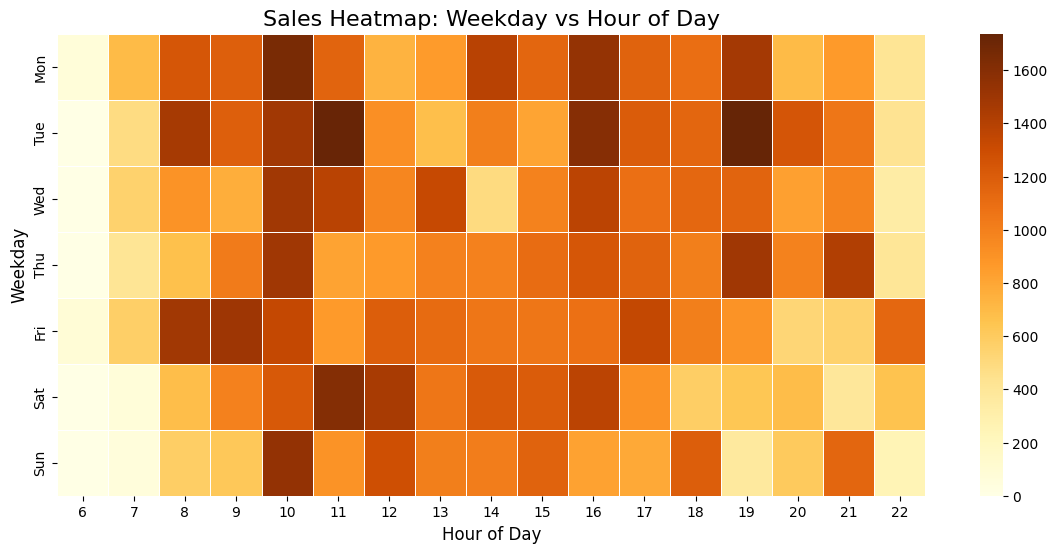

In [24]:
# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5)
plt.title("Sales Heatmap: Weekday vs Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Weekday", fontsize=12)
plt.show()

WHy the chart?

This heatmap shows bright sports where  sales spikes
It reveals coffee rush times.
It helps optimize staff schedules and promotions at exact times.

BUSINESS RECOMMENDATIONS:

    The coffee shop should focus on strengthening  its best-sellers, optimizing prizing for  premium items, running targeted promotions
    during weak sales period, and aligning operations with time based demand trends.

    1. PRODUCT  STRATEGY:
     Top sellers eg Latte, Cappucino, Americano, Americano with Milk, Hot Chocolate should remain the focus.
     Low selling products should be reviewed - i.e promotions, bundling with popular items,
     Introduce seasonal/ limited-edition flavors to boost sales in  months with lower revenue

   2. PRICING AND PROMOTIONS:
   Promote bulk purchases e.g ("Buy 2 get 1 free" or coffee + snack bundles) to increase average basket size.
   3. TIME-BASED STRATEGY:
     Day of Week Insight: Weekdays dominate sales, launch weekend offers to balance traffic.
    Monthly Insight: Capitalize on peak months by preparing adequate inventory and running seasonal campaigns.

   4. PAYMENT STRATEGY:
   Only payment through card seems to be available.
   Introduce other methods to enable diversity i.e UPI, online payments, Cash, M-Pesa etc

   5. Opperational Effeciency:
   Align staff shifts with peak hours/days to reduce waiting time.
   Inventory Management should match monthly/ weekly trends to avoid stockouts or wastages.  